# Perkenalan

Nama : Febrian Hendifa

Batch : FTDS-016-RMT

Dataset : Telco Customer Churn

Objectives : Mampu memahami konsep Artificial Neural Network dan memprediksi Churn pada user

# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.pipeline import Pipeline, make_pipeline
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
from keras.layers import Dense

from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.shape

(7043, 21)

Terdapat 7043 baris dan 21 kolom

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset ini memiliki 3 buah tipe data yaitu object, int64, dan float64

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada data yang memiliki missing value

In [8]:
# Mengubah data "TotalCharges" menjadi tipe data numerik

data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Disini saya mengubah data pada kolom "TotalCharges" menjadi numerik yang tadinya object, karna saya melihat bahwa ini dikolom "TotalCharges" merupakan numerik 

# Exploratory Data Analysis (EDA)

## Info Data

customerID : Customer ID

gender : Whether the customer is a male or a female

SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

Partner : Whether the customer has a partner or not (Yes, No)

Dependents : Whether the customer has dependents or not (Yes, No)

tenure : Number of months the customer has stayed with the company

PhoneService : Whether the customer has a phone service or not (Yes, No)

MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract : The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged to the customer monthly

TotalCharges : The total amount charged to the customer

Churn : Whether the customer churned or not (Yes or No)

## Churn

<AxesSubplot:ylabel='Churn'>

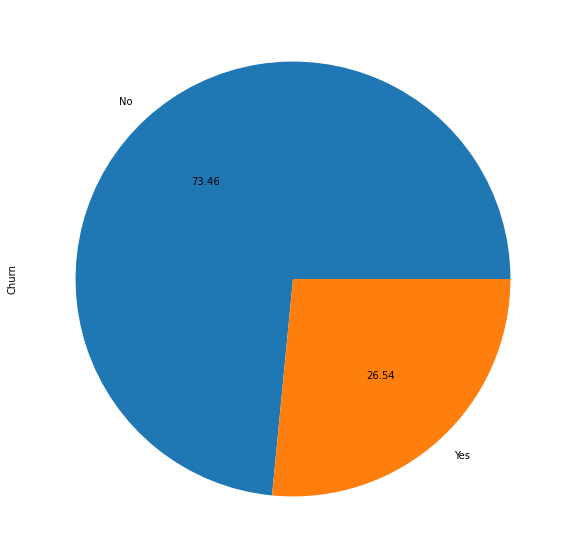

In [10]:
data['Churn'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

Terlihat jika kelas No lebih banyak dari pada kelas Yes yang berarti banyak pelanggan yang merasa kurang puas atau tidak puas terhadap layanan atau produk. Dengan presentase No 73,46% dan Yes 26,54%.

## Contract

<AxesSubplot:ylabel='Contract'>

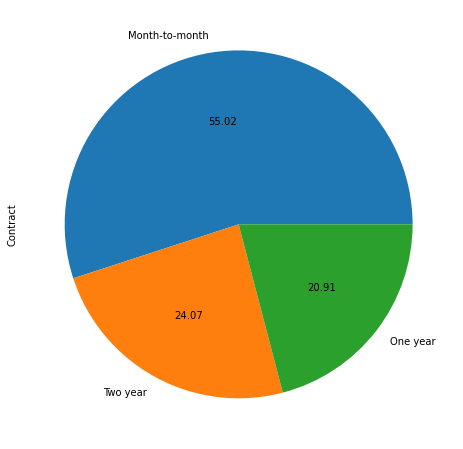

In [11]:
data['Contract'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Terlihat jika banyak pelanggan yang memilih jenis kontrak Month-to-Month dengan 55,02%, Two year 24,07%, dan One year 20,91%

## PaymentMethod

<AxesSubplot:ylabel='PaymentMethod'>

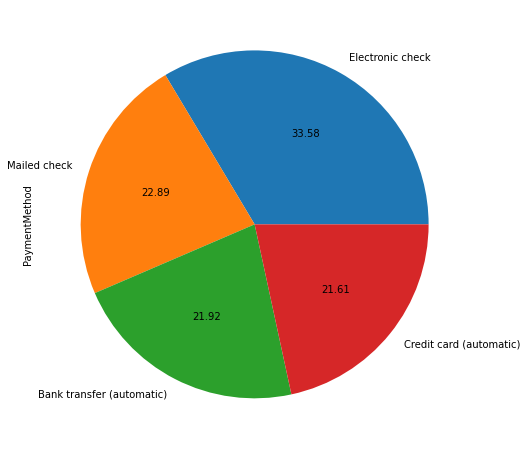

In [12]:
data['PaymentMethod'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Terlihat jika banyaknya pelanggan memilih jenis pembayaran dengan menggunakan sistem Electronic check dengan 33,58%, lalu Mailed check 22,89%, Bank transfer (automatic) 21,92%, dan Credit card (automatic) 21,61%

## InternetService

<AxesSubplot:ylabel='InternetService'>

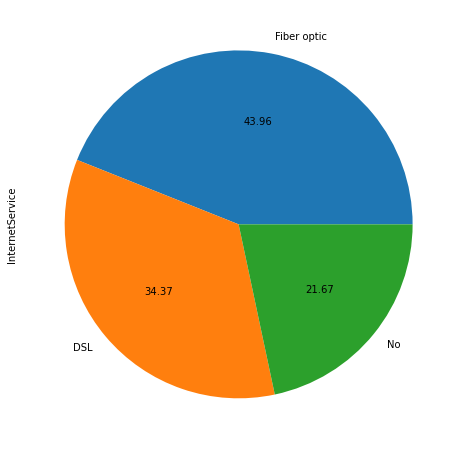

In [13]:
data['InternetService'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Terlihat jika banyak pelanggan memilih jenis service internet Fiber optic dengan 43,96%, lalu DSL 34,37%, dan No 21,67%

## Relationship Between

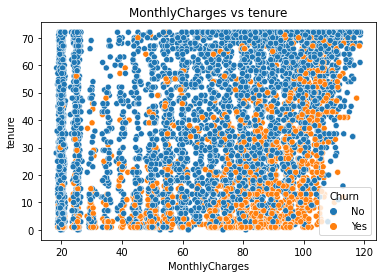

In [14]:
# Relationship between MonthlyCharges vs TotalCharges features
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn",  data = data)
plt.title('MonthlyCharges vs tenure')
plt.show()

Relasi antara fitur "MonthlyCharges" dan "tenure" bahwa jumlah yang dibebankan kepada pelanggan setiap bulannya mempengaruhi jumlah tagihan pada setiap bulannya

<AxesSubplot:xlabel='Churn', ylabel='count'>

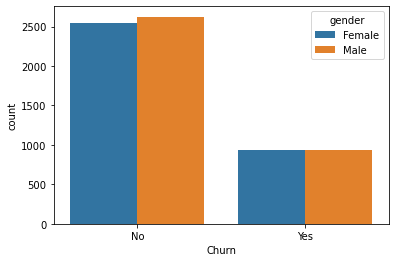

In [15]:
sns.countplot(x='Churn',hue='gender',data=data)

Terlihat jika jenis kelamin Female lebih didominasi tidak memperpanjang layanan mereka terhadap produk atau pelayanan perusahaan. Begitu juga jenis kelamin Male lebih didominasi tidak memperpanjang layanan. Dan hanya 900 pelanggan yang memperpanjang layanan baik Female maupun Male

<AxesSubplot:xlabel='Churn', ylabel='count'>

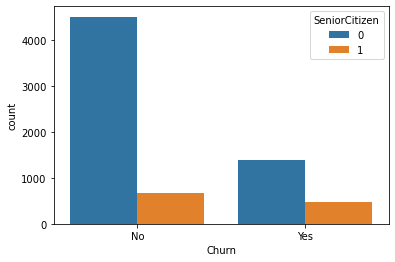

In [16]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=data)

Terlihat dimana customer sudah menjadi pelanggan lama atau tidak. Pelanggan lama yang sudah lama berlangganan, juga didominasi tidak memperpanjang layanan yang mereka pilih. Sebaliknya, juga banyak pelanggan baru didominasi tidak memperpanjang layanan mereka. Berdasrkan hal ini, bisa menjadi evaluasi perusahaan mengapa para customer banyak tidak mengunakan jasa layanan yang telah ditawarkan

## Heatmap

In [17]:
# Mengubah data kategori menjadi numerik untuk pembuatan heatmap

data1 = data.copy()
data1 = data1.apply(LabelEncoder().fit_transform)

<AxesSubplot:>

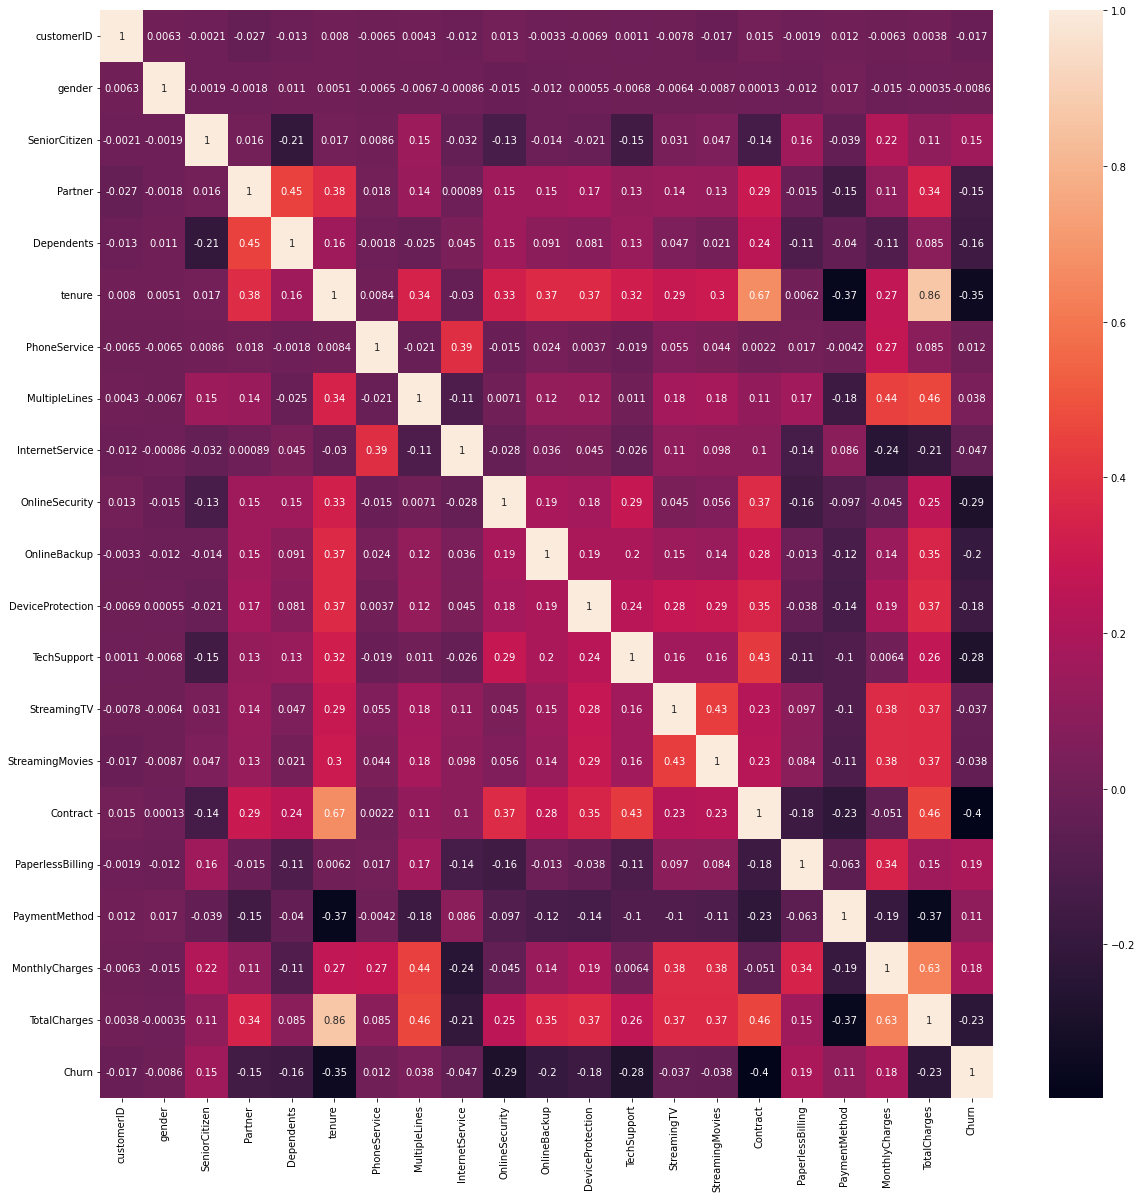

In [18]:
plt.figure(figsize = (20, 20))
sns.heatmap(data1.corr(), annot = True)

Kolom yang memiliki nilai korelasi yang tinngi dengan kolom "Churn" adalah :
1. PaperlessBilling denga 0,19
2. MonthlyCharges dengan 0,18
3. SeniorCitizen dengan 0,15
4. PaymentMethod dengan 0,11
5. MultipleLines dengan 0,038
6. PhoneService dengan 0,012

# Data Preprocessing

## Model Inference

In [19]:
# Get data model inference

data_inf = data.sample(20, random_state=32)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1490,8016-ZMGMO,Female,1,Yes,No,66,Yes,Yes,DSL,No,...,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),70.85,4738.85,No
346,2034-GDRCN,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.40,168.20,Yes
433,2957-LOLHO,Male,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.40,518.90,Yes
1636,1371-OJCEK,Female,0,No,No,48,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.35,1133.70,No
5594,0027-KWYKW,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95,No
843,6549-NNDYT,Female,0,No,No,13,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),30.85,394.10,No
2573,4074-SJFFA,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,54.75,54.75,Yes
2368,6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
4495,4702-IOQDC,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.10,Yes
1682,9225-BZLNZ,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,85.25,6083.10,No


In [20]:
# Remove Inference Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8016-ZMGMO,Female,1,Yes,No,66,Yes,Yes,DSL,No,...,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),70.85,4738.85,No
1,2034-GDRCN,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.40,168.20,Yes
2,2957-LOLHO,Male,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.40,518.90,Yes
3,1371-OJCEK,Female,0,No,No,48,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.35,1133.70,No
4,0027-KWYKW,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95,No
5,6549-NNDYT,Female,0,No,No,13,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),30.85,394.10,No
6,4074-SJFFA,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,54.75,54.75,Yes
7,6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
8,4702-IOQDC,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.10,Yes
9,9225-BZLNZ,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,85.25,6083.10,No


## Splitting between X and y

In [22]:
X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

In [23]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=32)

print('Train Size :', X_train.shape)
print('Val Size :', X_val.shape)
print('Test Size :', X_test.shape)

Train Size : (4494, 20)
Val Size : (1124, 20)
Test Size : (1405, 20)


Disini kolom 'Churn' dijadikan sebagi targetnya

## Feature Selection

In [24]:
# Mengubah data kategori menjadi numerik untuk melihat skor pada setiap fitur

encoder = LabelEncoder() 
X['customerID'] = encoder.fit_transform(X['customerID'])
X['gender'] = encoder.fit_transform(X['gender'])
X['Partner'] = encoder.fit_transform(X['Partner'])
X['Dependents'] = encoder.fit_transform(X['Dependents'])
X['PhoneService'] = encoder.fit_transform(X['PhoneService'])
X['MultipleLines'] = encoder.fit_transform(X['MultipleLines'])
X['InternetService'] = encoder.fit_transform(X['InternetService'])
X['OnlineSecurity'] = encoder.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = encoder.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = encoder.fit_transform(X['DeviceProtection'])
X['TechSupport'] = encoder.fit_transform(X['TechSupport'])
X['PhoneService'] = encoder.fit_transform(X['PhoneService'])
X['MultipleLines'] = encoder.fit_transform(X['MultipleLines'])
X['StreamingTV'] = encoder.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = encoder.fit_transform(X['StreamingMovies'])
X['Contract'] = encoder.fit_transform(X['Contract'])
X['PaperlessBilling'] = encoder.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = encoder.fit_transform(X['PaymentMethod'])
X['TotalCharges'] = encoder.fit_transform(X['TotalCharges'])

In [25]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([2.29980797e+03, 2.69463809e-01, 1.34661536e+02, 8.06538518e+01,
       1.31946830e+02, 1.61040788e+04, 1.01369814e-01, 1.00922349e+01,
       9.65523325e+00, 5.46604760e+02, 2.26377884e+02, 1.88220173e+02,
       5.18917152e+02, 7.15803714e+00, 8.27444905e+00, 1.10827373e+03,
       1.04697953e+02, 5.75491547e+01, 3.68669626e+03, 4.52894481e+05])

In [26]:
chi = pd.Series(fit.scores_)
chi.index = X.columns
chi.sort_values(ascending=False)

TotalCharges        452894.480750
tenure               16104.078763
MonthlyCharges        3686.696257
customerID            2299.807970
Contract              1108.273732
OnlineSecurity         546.604760
TechSupport            518.917152
OnlineBackup           226.377884
DeviceProtection       188.220173
SeniorCitizen          134.661536
Dependents             131.946830
PaperlessBilling       104.697953
Partner                 80.653852
PaymentMethod           57.549155
MultipleLines           10.092235
InternetService          9.655233
StreamingMovies          8.274449
StreamingTV              7.158037
gender                   0.269464
PhoneService             0.101370
dtype: float64

Skor fitur yang memiliki hubungan dengan kolom 'Churn' adalah TotalCharges, tenur, MonthlyCharges, Contract, OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, SeniorCitizen, Dependents, PaperlessBilling, Partner, dan PaymentMethod. Sedangkan fitur yang tidak memiliki hubungan dengan 'Churn' adalah MultipleLines, InternetService, StreamingMovies, StreamingTV, gender, customerID, dan PhoneService. Untuk kolom yang tidak memiliki hubungan dengan 'Churn' akan dihapus

In [27]:
X_train.drop(['customerID','MultipleLines','InternetService','StreamingMovies',
              'StreamingTV','gender','PhoneService'], axis=1, inplace=True)
X_val.drop(['customerID','MultipleLines','InternetService','StreamingMovies',
              'StreamingTV','gender','PhoneService'], axis=1, inplace=True)

In [28]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2630,1,No,No,5,Yes,Yes,No,Yes,Month-to-month,No,Credit card (automatic),59.90,287.85
4029,0,No,No,46,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.75,2893.40
563,0,Yes,Yes,15,Yes,No,No,Yes,One year,No,Electronic check,101.90,1667.25
6452,0,Yes,Yes,18,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.05,345.90
5056,0,Yes,No,1,No,No,Yes,No,Month-to-month,No,Credit card (automatic),75.35,75.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0,Yes,No,6,No,No,No,Yes,Month-to-month,Yes,Electronic check,49.15,270.80
6968,0,Yes,Yes,23,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),69.50,1652.10
5512,0,No,No,2,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,42.70
7020,0,Yes,Yes,11,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


## Handling Missing Value

In [29]:
# Check Values on X_train
X_train.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [30]:
# Check Values on X_val
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [31]:
# Check Values on X_test
X_val.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        4
dtype: int64

Terdapat missing values terhadap X_train dan juga X_valnya. Missing values ini akan di handle pada bagian pipeline

## Handling Outlier

In [32]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

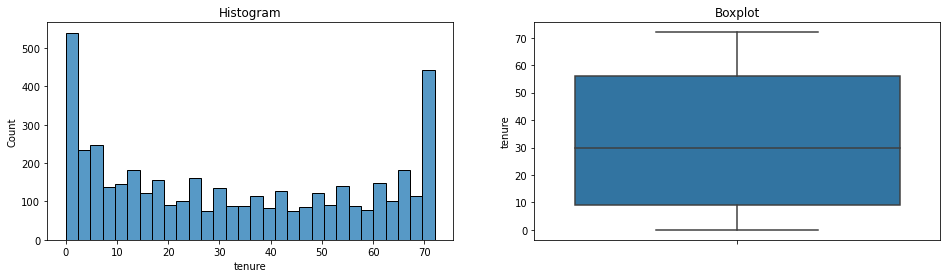


Skewness Value :  0.21030141067605962


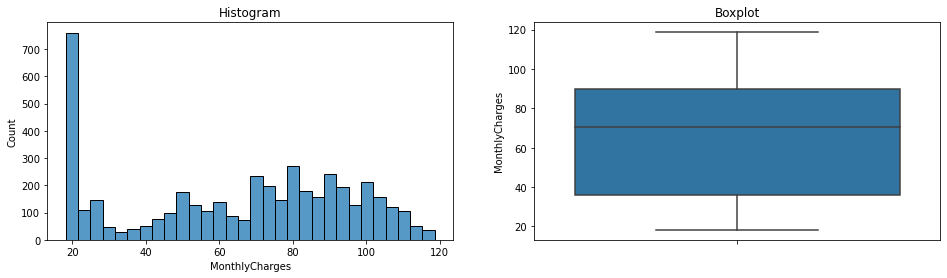


Skewness Value :  -0.2361574172918258


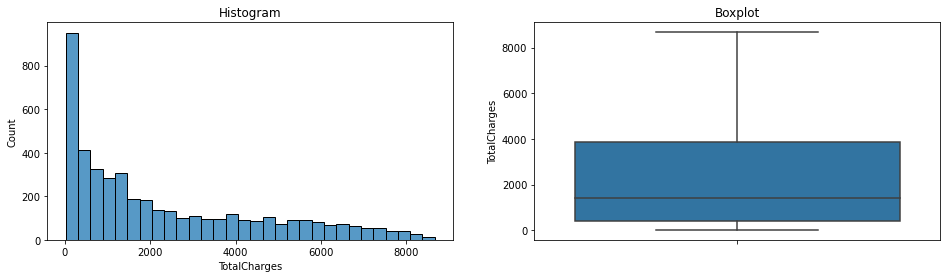


Skewness Value :  0.9273017738240519


In [33]:
diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value : ', X_train['tenure'].skew())

diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value : ', X_train['MonthlyCharges'].skew())

diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value : ', X_train['TotalCharges'].skew())

Terlihat dari histogram dan boxplot diketahui jika tidak ada data outlier

## Get Numerical Columns and Categorical Columns

In [34]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [35]:
# Memisahkan masing2 set berdasarkan kolom kategori atau numerik

# Train set
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

# Validation set
X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

# Test Set
X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_test_cat.head()

,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
941,Yes,Yes,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check
4528,No,No,No,No,No,No,Month-to-month,No,Mailed check
4981,No,No,Yes,Yes,No,Yes,Two year,No,Mailed check
4566,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
421,Yes,Yes,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check


## Pipeline

In [36]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [37]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(4494, 29)

In [38]:
# Feature Encoding

labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_val = labelencoder.fit_transform(y_val)
y_test = labelencoder.fit_transform(y_test)

y_train

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
# Melakukan SMOTE untuk data imbalance

sm = SMOTE(sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X_train, y_train)

print(f'Train dataset shape: {Counter(y_train)}')
print(f'Train dataset shape resample: {Counter(y_res)}')

Train dataset shape: Counter({0: 3329, 1: 1165})
Train dataset shape resample: Counter({0: 3329, 1: 3329})


In [40]:
# Pipeline Tensorflow data train, val, dan test

#Train dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_res, y_res))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(64)

# Validation dataset

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)

# Test dataset

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)

# Sequential API

## Model Definition

In [41]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(16, activation='relu', input_shape=(29,))) # Hidden Layer 1
model_sequential.add(Dense(8, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Model Training

In [43]:
# Melakukan model training sequential

history_seq = model_sequential.fit(train_dataset, epochs=50, validation_data = val_dataset)

Epoch 1/50
105/105 [==============================] - 1s 3ms/step - loss: 0.6252 - accuracy: 0.6706 - val_loss: 0.6376 - val_accuracy: 0.6441
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7393 - val_loss: 0.6227 - val_accuracy: 0.6575
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7469 - val_loss: 0.6182 - val_accuracy: 0.6477
Epoch 4/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7471 - val_loss: 0.6147 - val_accuracy: 0.6450
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7534 - val_loss: 0.6024 - val_accuracy: 0.6610
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7544 - val_loss: 0.6001 - val_accuracy: 0.6646
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7559 - val_loss: 0.5991 - val_accuracy: 0.6664
Epoch 

## Model Evaluation

In [44]:
# Membuat dataframe untuk hasil history_seq

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.625237,0.670622,0.637648,0.644128
1,0.552847,0.739261,0.622745,0.657473
2,0.525118,0.746921,0.618237,0.647687
3,0.515164,0.747071,0.614699,0.645018
4,0.508423,0.753379,0.602398,0.661032
5,0.503374,0.754431,0.600149,0.664591
6,0.501036,0.755933,0.599136,0.666370
7,0.498022,0.759838,0.589729,0.673488
8,0.496173,0.760889,0.587129,0.674377
9,0.493914,0.761340,0.583447,0.679715


<AxesSubplot:>

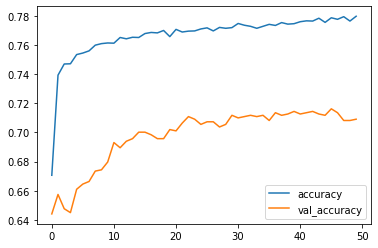

In [45]:
# Grafik data antara accuracy dan val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

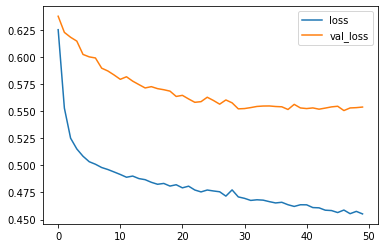

In [46]:
# Grafik data antara loss dan val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [47]:
# Model Evaluation

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

44/44 [==============================] - 0s 988us/step
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1019
           1       0.46      0.84      0.60       386

    accuracy                           0.69      1405
   macro avg       0.69      0.74      0.67      1405
weighted avg       0.79      0.69      0.71      1405



Terlihat jika model memiliki nilai akurasi di 70%. Model berhasil memprediksi 63% pada kelas 0/No pada Churn dengan benar dan 37% yang salah prediksi. Model juga berhasil melakukan prediksi 86% pada kelas 1/Yes pada Churn dengan benardan 14% yang salah prediksi

## Model Improvement

In [48]:
model_sequential1 = Sequential()
model_sequential1.add(Dense(16, activation='relu', input_shape=(29,))) # Hidden Layer 1
model_sequential1.add(Dense(8, activation='relu')) # Hidden Layer 2
model_sequential1.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential1.compile(loss='binary_crossentropy',
                         optimizer='Adamax',
                         metrics=['accuracy'])

model_sequential1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                480       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [49]:
tf.keras.utils.plot_model(model_sequential1, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [50]:
history_seq1= model_sequential1.fit(train_dataset, epochs=50, validation_data = val_dataset)

Epoch 1/50
105/105 [==============================] - 1s 3ms/step - loss: 0.7231 - accuracy: 0.5044 - val_loss: 0.6286 - val_accuracy: 0.6797
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6763 - val_loss: 0.6132 - val_accuracy: 0.6806
Epoch 3/50
105/105 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.7166 - val_loss: 0.5866 - val_accuracy: 0.6868
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7348 - val_loss: 0.5617 - val_accuracy: 0.7028
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7426 - val_loss: 0.5551 - val_accuracy: 0.7002
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7486 - val_loss: 0.5520 - val_accuracy: 0.7064
Epoch 7/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.7525 - val_loss: 0.5553 - val_accuracy: 0.7028
Epoch 

In [51]:
history_seq1_df = pd.DataFrame(history_seq1.history)
history_seq1_df

,loss,accuracy,val_loss,val_accuracy
0,0.723066,0.504356,0.628645,0.679715
1,0.646783,0.676329,0.613217,0.680605
2,0.611874,0.716582,0.586644,0.686833
3,0.575857,0.734755,0.561724,0.702847
4,0.541841,0.742565,0.555101,0.700178
5,0.522925,0.748573,0.552022,0.706406
6,0.512488,0.752478,0.555315,0.702847
7,0.507533,0.754431,0.551920,0.713523
8,0.504118,0.758636,0.548770,0.717082
9,0.500178,0.757134,0.549035,0.709964


<AxesSubplot:>

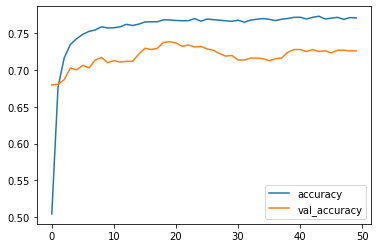

In [52]:
history_seq1_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

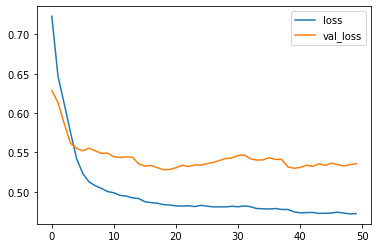

In [53]:
history_seq1_df[['loss', 'val_loss']].plot()

In [54]:
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq

print(classification_report(y_test, y_pred_seq))

print('\n----------------Setelah Model Improvement----------------')
print(' ')

y_pred_seq1 = model_sequential1.predict(X_test)
y_pred_seq1 = np.where(y_pred_seq1 >= 0.5, 1, 0)
y_pred_seq1

print(classification_report(y_test, y_pred_seq1))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1019
           1       0.46      0.84      0.60       386

    accuracy                           0.69      1405
   macro avg       0.69      0.74      0.67      1405
weighted avg       0.79      0.69      0.71      1405


----------------Setelah Model Improvement----------------
 
44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1019
           1       0.48      0.85      0.61       386

    accuracy                           0.71      1405
   macro avg       0.70      0.75      0.69      1405
weighted avg       0.80      0.71      0.72      1405



Setelah dilakukan Model Improvement dengan mengganti optimizers 'Adam' ke 'Adamax' terlihat jika modelnya mengalami peningkatan accuracy dari 70% ke 72%. Model juga berhasil melakukan prediksi 68% pada kelas 0/No pada Churn dengan benar dan 32% yang salah prediksi. Model juga berhasil melakukan prediksi 82% pada kelas 1/Yes pada Churn dengan benar dan 18% yang salah prediksi

# Functional API

## Model Definition

In [55]:
# Create Functional Model

input_layer = Input(shape=(29,))
hidden1_layer = Dense(16, activation='relu')(input_layer)
hidden2_layer = Dense(8, activation='relu')(hidden1_layer)

concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 16)           480         ['input_1[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 8)            136         ['dense_6[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 37)           0           ['input_1[0][0]',                
                                                                  'dense_7[0][0]']            

In [56]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Model Training

In [57]:
# Train the model

history_functional = model_functional.fit(train_dataset, epochs=50, validation_data = val_dataset)

Epoch 1/50
105/105 [==============================] - 1s 3ms/step - loss: 0.8478 - accuracy: 0.3644 - val_loss: 0.7865 - val_accuracy: 0.3683
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6182 - val_loss: 0.7154 - val_accuracy: 0.5649
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.7336 - val_loss: 0.6726 - val_accuracy: 0.6468
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7468 - val_loss: 0.6499 - val_accuracy: 0.6566
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7465 - val_loss: 0.6342 - val_accuracy: 0.6575
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7520 - val_loss: 0.6202 - val_accuracy: 0.6655
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7543 - val_loss: 0.6095 - val_accuracy: 0.6646
Epoch 

## Model Evaluation

In [58]:
# Create Dataframe

history_functional_df = pd.DataFrame(history_functional.history)
history_functional_df

,loss,accuracy,val_loss,val_accuracy
0,0.847804,0.364374,0.786529,0.368327
1,0.644106,0.618204,0.715358,0.564947
2,0.551754,0.733554,0.672552,0.646797
3,0.528935,0.746771,0.649855,0.656584
4,0.519558,0.746470,0.634240,0.657473
5,0.511745,0.752028,0.620219,0.665480
6,0.508741,0.754281,0.609479,0.664591
7,0.505789,0.752028,0.606342,0.668149
8,0.504638,0.755933,0.595848,0.677936
9,0.498761,0.755332,0.592550,0.680605


<AxesSubplot:>

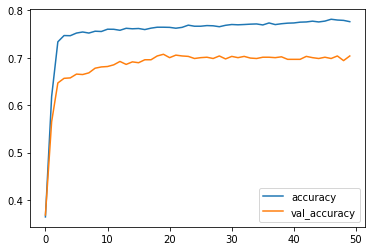

In [59]:
# Plot between Accuracy and val_accuracy

history_functional_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

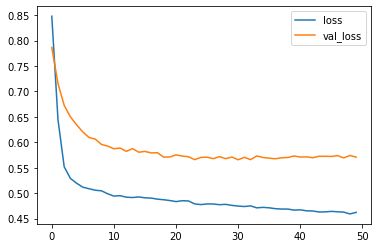

In [60]:
# Plot between loss and val_loss

history_functional_df[['loss', 'val_loss']].plot()

In [61]:
# Model Evaluation

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

44/44 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1019
           1       0.47      0.88      0.61       386

    accuracy                           0.69      1405
   macro avg       0.70      0.75      0.68      1405
weighted avg       0.81      0.69      0.71      1405



Terlihat jika model memiliki nilai akurasi di 69%. Model berhasil memprediksi 63% pada kelas 0/No pada Churn dengan benar dan 37% yang salah prediksi. Model juga berhasil melakukan prediksi 84% pada kelas 1/Yes pada Churn dengan benardan 16% yang salah prediksi

## Model Improvement

In [62]:
input_layer = Input(shape=(29,))
hidden1_layer = Dense(16, activation='relu')(input_layer)
hidden2_layer = Dense(8, activation='relu')(hidden1_layer)

concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional1 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional1.compile(loss='binary_crossentropy',
                         optimizer='Adamax',
                         metrics=['accuracy'])

model_functional1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 16)           480         ['input_2[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 8)            136         ['dense_9[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 37)           0           ['input_2[0][0]',                
                                                                  'dense_10[0][0]']         

In [63]:
tf.keras.utils.plot_model(model_functional1, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [64]:
history_functional1 = model_functional1.fit(train_dataset, epochs=50, validation_data = val_dataset)

Epoch 1/50
105/105 [==============================] - 1s 3ms/step - loss: 0.8283 - accuracy: 0.3818 - val_loss: 0.7701 - val_accuracy: 0.4440
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5610 - val_loss: 0.7033 - val_accuracy: 0.5756
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6822 - val_loss: 0.6566 - val_accuracy: 0.6415
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7208 - val_loss: 0.6169 - val_accuracy: 0.6779
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7393 - val_loss: 0.6001 - val_accuracy: 0.6931
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7438 - val_loss: 0.5920 - val_accuracy: 0.7020
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7484 - val_loss: 0.5812 - val_accuracy: 0.7055
Epoch 

In [65]:
history_functional1_df = pd.DataFrame(history_functional1.history)
history_functional1_df

,loss,accuracy,val_loss,val_accuracy
0,0.828303,0.381796,0.770113,0.443950
1,0.688272,0.560979,0.703322,0.575623
2,0.611938,0.682187,0.656640,0.641459
3,0.565024,0.720787,0.616931,0.677936
4,0.537998,0.739261,0.600123,0.693061
5,0.526112,0.743767,0.592046,0.701957
6,0.519421,0.748423,0.581194,0.705516
7,0.514727,0.755032,0.568193,0.715302
8,0.508943,0.757885,0.563046,0.717972
9,0.504979,0.758035,0.555920,0.725979


<AxesSubplot:>

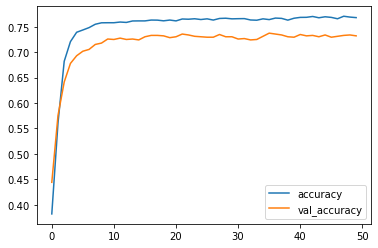

In [66]:
history_functional1_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

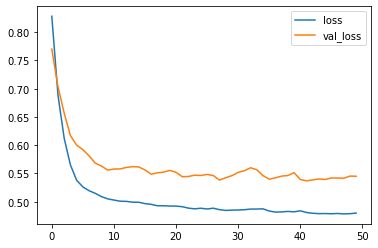

In [67]:
history_functional1_df[['loss', 'val_loss']].plot()

In [68]:
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
y_pred_func

print(classification_report(y_test, y_pred_func))

print('\n----------------Setelah Model Improvement----------------')
print(' ')

y_pred_func1 = model_functional1.predict(X_test)
y_pred_func1 = np.where(y_pred_func1 >= 0.5, 1, 0)
y_pred_func1

print(classification_report(y_test, y_pred_func1))

44/44 [==============================] - 0s 981us/step
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1019
           1       0.47      0.88      0.61       386

    accuracy                           0.69      1405
   macro avg       0.70      0.75      0.68      1405
weighted avg       0.81      0.69      0.71      1405


----------------Setelah Model Improvement----------------
 
44/44 [==============================] - 0s 973us/step
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1019
           1       0.49      0.85      0.62       386

    accuracy                           0.71      1405
   macro avg       0.70      0.76      0.70      1405
weighted avg       0.80      0.71      0.73      1405



Setelah dilakukan Model Improvement dengan mengganti optimizers 'Adam' ke 'Adamax' terlihat jika modelnya mengalami peningkatan accuracy dari 69% ke 71%. Model juga berhasil melakukan prediksi 67% pada kelas 0/No pada Churn dengan benar dan 33% yang salah prediksi. Model juga berhasil melakukan prediksi 83% pada kelas 1/Yes pada Churn dengan benar dan 17% yang salah prediksi

# Model Saving

In [69]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  joblib.dump(final_pipeline, file_1)

In [70]:
# Summary of Model Sequential

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Freeze Model

model_sequential.trainable = False
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 625
Trainable params: 0
Non-trainable params: 625
_________________________________________________________________


In [72]:
# Save ANN Model

model_sequential.save('churn_model.h5')

# Model Inference

In [73]:
# Load The Models

with open('final_pipeline.pkl', 'rb') as file_1:
  final_pipeline = joblib.load(file_1)

from tensorflow.keras.models import load_model
model_ann = load_model('churn_model.h5')

In [74]:
# Transform Inference-Set 

data_inf_transform = final_pipeline.transform(data_inf)
data_inf_transform

array([[ 2.24868935,  1.34076656,  0.19291804,  1.05967261,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [-0.44470349, -1.25094479,  0.84271121, -0.94652309,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [-0.44470349, -0.84598989, -0.6529764 , -0.79259032,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
  

In [75]:
# Predict using Neural Network

y_pred_inf = model_ann.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 50ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [76]:
y_pred = []

for val in y_pred_inf:
    if val >= 0.5:
        y_pred.append('Yes')
    else:
        y_pred.append('No')

y_pred[:20]

['Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No']

In [77]:
y_pred_inf_df = pd.DataFrame(y_pred, columns= ['Churn Prediction'])
y_pred_inf_df

,Churn Prediction
0,Yes
1,Yes
2,Yes
3,No
4,Yes
5,Yes
6,Yes
7,No
8,Yes
9,No


In [78]:
df_final = pd.concat([data_inf, y_pred_inf_df], axis=1)
df_final

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Prediction
0,8016-ZMGMO,Female,1,Yes,No,66,Yes,Yes,DSL,No,...,No,Yes,No,One year,Yes,Bank transfer (automatic),70.85,4738.85,No,Yes
1,2034-GDRCN,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.40,168.20,Yes,Yes
2,2957-LOLHO,Male,0,No,No,12,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.40,518.90,Yes,Yes
3,1371-OJCEK,Female,0,No,No,48,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.35,1133.70,No,No
4,0027-KWYKW,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95,No,Yes
5,6549-NNDYT,Female,0,No,No,13,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),30.85,394.10,No,Yes
6,4074-SJFFA,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,Yes,Month-to-month,Yes,Mailed check,54.75,54.75,Yes,Yes
7,6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No,No
8,4702-IOQDC,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.10,Yes,Yes
9,9225-BZLNZ,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Two year,Yes,Electronic check,85.25,6083.10,No,No


# Pengambilan Kesimpulan

- Dari data churn terlihat jika banyak user yang masuk kategori No dengan 73,46% sedangkan user dengan kategor yes 26,54% yang berarti tidak balance antara user No dan Yes.
- Dari pemodelan Sequential API dan Functional API terlihat jika nilai akurasi dari Sequential API lebih tinggi dari pada Functional API, dan setelah dilakukan Model Improvement pada model Sequential API mengalami peningkatan akurasi sebesar 2% dari 70% menjadi 72%
- Pada pengujiannya dari 20 data yang digunakan terdapat 2 data yang mengalami kesalahan prediksi atau hasilnya tidak sesuai yang menandakan dijak model Sequential API ini memiliki nilai akurasi sebesar 80% pada data pengujiannya